# Prédiction des coûts d'assurance maladie à l'aide du ML
Projet de Data Science - Séminaire "Data Science, ML et IA" Travail Pratique pour la Microcertification

## 1 - Introduction
Ce projet se base sur un set de données receuillant les caractéristiques personnelles d'un groupe de personnes.

Les coûts de la santé sont un enjeu majeur pour le systèmes d'assurance, les citoyens ainsi que pour les politique publique. L'estimation et l'analyse des dépenses dans le domaine médical permetterai un ajustement des offres, une amélioration de ces dernières, une meilleure gestion des risques ainsi que des tarifs plus équitables.

Afin de procéder à cette analyse, dans ce projet, des techniques de Data science et de ML seront utilisé afin d'effectuer la prédiction des coûts d'assurance en se basant sur des données démographiques et médicales.
Via ce projet, nous allons utiliser des processus de data science tels que l'exploiration des données, l'évalutation et l'interpéretation des modéles périctifs.

Ce projet a pour but de pratiquer les concepts étudiés lors du séminaire comme l'anayse exploratoire des donées, le feature engineering, la modélisation superivsée et l'évaluation des performances des modèles.

## 2 - Problèmatique
**Est-il possible de prédire le coût annuel de l'assurance maladie d'une personne en partant de ses caractéristiques personnelles, telles que son âge, le sexe, la région habitée, son indice de masse corporelle (IMC - estimation de la coruplence d'une personne), le nombre d'enfants à charge et son statut de fumeur ?**

La problématique correspond à un problème de régression supervisée avec variable cible le coût annuel de l'assurance maladie.

## 3 - Objectifs du projet

Le projet a pour objectifs les points suivants :

- Comprendre et effecuter l'exploration du jeu de données utilisé
- Identifier les caractéristiques (features) influençant le côut de l'assurance maladie
- Préparer le jeu de données pour effecuter la modélisation
- Tester et commenter différents modèles de machine learning
- Comparer le résultat des modèles
- Intérperter les résultats des modèles obtenus
- Commenter les limites et les possibles améliorations

Ces objectifs permetterons une illusration claire et structurée des étapes principales d'un projet de Data science en se basant sur des données pré sélectionnée avec une problèmatique claire.

## 4 - Etude des données
Les données utilisées pour ce projet viennent du site kaggle - **Médical Cost Personal Dataset** : https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

*Source : Choi, M. (2017) Medical Cost personal Dataset. Kaggle*

Le fichier utilisé pour cette analyse contient au total 1338 lignes. Chaque ligne correspond à une personne.
Le fichier contient 7 colonnes au total :
- Age : âge de la personne
- Sex : sexe de la personne
- BMI : IMC - Indice de masse corporelle
- Children : nombre d'enfants à charge
- Smoker : statut de fumeur
- Region : région habitée (USA)
- Charges : coûts médicaux facturés

Chaque ligne correspond à une observation, la feature "charges" est la variable cible à prédire, ce que nous allons essayer d'effetuer le long de ce projet

## 7 - Typologie du problème

Ce problème se base sur une **régression supervisée** car la variable cible à prédire (Charges) est une valeur numérique continue.

En effet, la régression supervisée a pour but d'apprendre à effectuer une prédiction en se basant sur une valeur numérique en partant d'exemple connus en aillant déjà la bonne réponse.
Le modèle a pour but d'apprendre la relation qu'il y a entre les variables du set de données et la variable cible (ici les charges).

#Plusieurs algorithmes peuvent être utilisés pour atteindre cet objectifs, tels que :

#- *Régression linéaire*
#- *Régression par arbre de décision*
#- *Random forest regressor*

In [8]:
import matplotlib.pyplot as plt
# Chargement du jeu de données avec l'aide de la bibliothèque Pandas
import pandas as pd
from scipy.stats import alpha

# Le fichier téléchargé - insurance.csv - est stocké dans le dossier "Data" du projet
df = pd.read_csv("data/insurance.csv")

# Affichage des 5 permières lignes du set de données afin d'avoir un aperçu de la structure
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Nous allons procéder avec une **analyse exploratoire des données (AED)**, une étape importante qui permet de mieux comprendre la structure ainsi que la qualité des données. De plus, grâce à cette analyse nous pouvons répréer les caractérstiques du jeu de données avant de commencer la modélisation.

In [9]:
# Affichage de la dimension du dataset (lignes, colonnes)
df.shape

(1338, 7)

In [10]:
# Information sur le set de données avec le type de données enregistrée ainsi que des évenutelles valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Il est possible de voir que le set de données n'a pas de valeur manquantes, un point positif pour la préparation des données

In [11]:
# Affichage des statistiques du set de données
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Ces statistiques prennent en considération les colonnes des valeurs numériques du set de données et permetent d'avoir une vue globale sur les données.

Les statistiques nous montrent :
- La moyenne (mean)
- L'écart type (std)
- La valeur minimale de la colonne sur l'entièreté du set (min)
- Les quartiles (25%, 50%, 75%)
- La valeur maximale de la colonne sur l'entièreté du set (max)

Grâce à ces statistiques, il est déjà possible en déduire que le coût moyen de l'assruance est assez élevé et qu'il est fortement variable entre les individus.

In [12]:
# Valeurs uniques par variable catégorielle (valeurs qualitatives)
df['sex'].value_counts(), df['smoker'].value_counts(), df['region'].value_counts()

(sex
 male      676
 female    662
 Name: count, dtype: int64,
 smoker
 no     1064
 yes     274
 Name: count, dtype: int64,
 region
 southeast    364
 southwest    325
 northwest    325
 northeast    324
 Name: count, dtype: int64)

Avec cette analyse, il est possible d'avoir une idée quant à la distribution des catégories des variables qualitatives.

Il est possible d'observer la proportion entre hommes et femmes (assez homogène), entre fumeurs et non fuméeurs (plus élévés).
La variable concernant le statu de fumeur pourrait avoir une incidence significative sur les coûts de l'assurance maladie et mérite un point d'attention.

In [13]:
# Librairies utilisées pour la modélisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Nous allons continuer avec l'analyse exploratoire des données en créant des modèles visuels

## Distribution des coûts d'assurance maladie

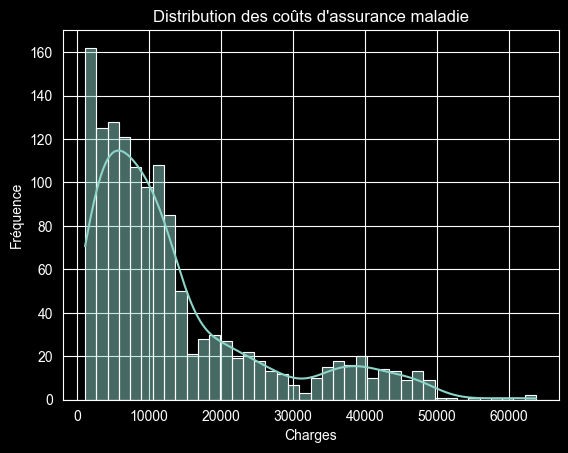

In [14]:
# Histogramme basé sur la variable "charges" avec des intervalles et une courbe de densité afin de montrer la tendance de la distribution
sns.histplot(df['charges'], bins=40, kde=True)

# Titre du graphique
plt.title("Distribution des coûts d'assurance maladie")

# Nom du label de l'axe X
plt.xlabel("Charges")

# Nom du label de l'axe Y
# Nombre de personnes dont les coûts sont compris dans l'intervalle représenté dans l'histogramme
plt.ylabel("Fréquence")

# Affichage de l'histogramme
plt.show()


<span style="color:slateblue">**Description de l'histogramme**</span> <br>
Dans ce graphique, nous pouvons analyser, pour chaque plage (intervalle) de coûts, combien de personnes sont concernées (combien de personnes ont des coûts correspondants à cet intervalle)

<span style="color:slateblue">**Intérprétation**</span> <br>
Les coûts entre personnes varient, nous pouvons remarquer une asymétrie vers droite. Ceci représente des coûts élevés pour une certain nombre d'individus.
Ces coûts élevés pourraient être influencés par des caractéristiques paricutlière de ces individus, tels que l'âge ou le tabagisme.

## Charges selon statu de fumeur

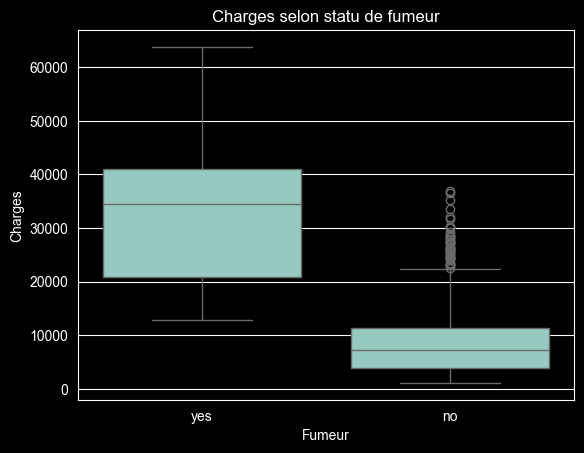

In [15]:
# Création d'un boxplot (boîte à moustaches) avec la librairie seaborn
# Graphique basé sur la variable catégorielle "fumeur" et la variable numérique "charges"
sns.boxplot(x='smoker', y='charges', data=df)

# Titre du graphique
plt.title("Charges selon statu de fumeur")

# Titre de la colonne x
plt.xlabel("Fumeur")

# Titre de la colonne y
plt.ylabel("Charges")

# Affichage du graphique
plt.show()

Ce graphique permet une comparaison entre la distribution des coûts des fumeurs et des non-fumeurs.

<span style="color:slateblue">**Description du boxplot**</span> <br>
- Médiane, ligne dans la boîte
- Quartiles, 25% et 75%, les extrémités de la boîte
- Moustaches, valeurs approximatives extrêmes, la plus grande et la plus petite
- Outliers, valeurs atypiques, points isolés

<span style="color:slateblue">**Interprétation**</span> <br>
Nous pouvons déterminer que les fumeurs ont, en moyenne, des coûts plus élevés que les non-fumeurs. Ceci permet de déterminer l'impact du tabagisme sur les dépenses médicales des individus.


## Relation entre IMC et charges


Le BMI (Body Mass Index) est un nombre reliant le poids et la taille, décrit par la formule suivante :

$${BMI} = \frac{\text{Poids (kg)}}{\text{Taille (m)}^2}$$

Cet indice permet d'avoir une idée de la corpulence d'une personne. Selon les standards de l'OMS ce dernier indique (https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/body-mass-index) :

- <18.5 : insuffisance pondérale
- 18.5 - 24.9 : poids normal
- 25 - 29.9 : surpoids
- 30 - 34.0 : obésité modérée (classe I)
- 35 - 39.9 : obésité sévère (classe II)
- '>= 40 : obésité morbide (classe III)

Cet indice a des limites et est à considérer comme indication générale, non pas comme diagnostic médical.
Cependant, dans le cadre de notre étude, il est intéressant de découvrir si l'IMC a une corrélation avec les dépenses médicales des individus.

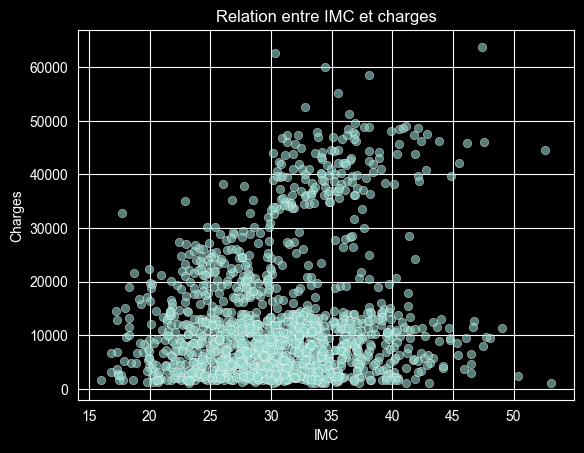

In [16]:
# Création d'un scatter plot (nuage de points) avec la librairie seaborn
# Graphique basé sur les variables numériques "BIM" et "charges"
# Alpha : transparence des points (0=invisible, 1=opaque)
sns.scatterplot(x='bmi', y='charges', data=df, alpha=0.6)

# Titre du graphique
plt.title("Relation entre IMC et charges")

# Titre de la colonne x
plt.xlabel("IMC")

# Titre de la colonne y
plt.ylabel("Charges")

# Affichage du graphique
plt.show()

<span style="color:slateblue">**Description du scatter plot**</span> <br>
Les points représentent les individus. Plus les points sont concentrés, plus il y a d'individus dans le même cas de figure.



<span style="color:slateblue">**Interprétation**</span> <br>
Il est possible de voir que la majorité de la population a un IMC compris entre 20 et 40 avec des charges se situant entre 2'000 et 15'000 dollars. Cependant, une forte variabilité est présente, ceci détermine une grande dispersion des charges pour un même IMC.
La relation entre l'augmentation de l'IMC et des charges n'est pas linéaire, même si avec l'augmentation de l'IMC les charges ont tendance à augmenter.

Il est possible de retrouver des valeurs extrêmes, des charges très élevées pour des IMC moyens et élevés.

Les charges deviennent plus variables pour les personnes aillant un IMC élevé, ceci est démontré par la dispersion des points.

Ces analyses suggèrent que l'IMC seul, ne suffit pas pour déterminer et expliquer la valeur des dépenses. D'autres facteurs sont à prendre en considération pour une analyse plus fiable.

## Relation entre âge et charges


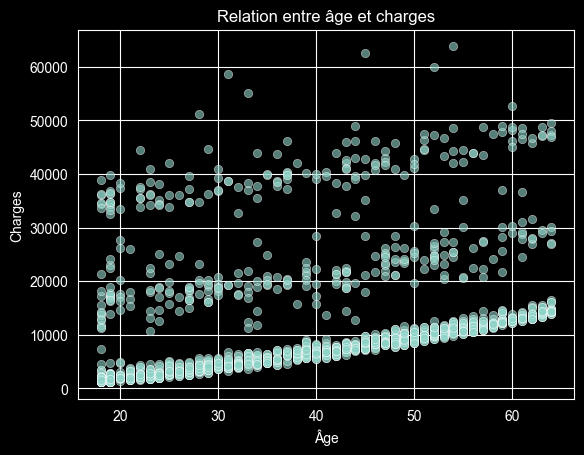

In [17]:
# Création d'un scatter plot (nuage de points) avec la librairie seaborn
# Graphique basé sur les variables numériques "age" et "charges"
# Alpha : transparence des points (0=invisible, 1=opaque)
sns.scatterplot(x='age', y='charges', data=df, alpha=0.6)

# Titre du graphique
plt.title("Relation entre âge et charges")

# Titre de la colonne x
plt.xlabel('Âge')

# Titre de la colonne y
plt.ylabel('Charges')

# Affichage du graphique
plt.show()


<span style="color:slateblue">**Description du scatter plot**</span> <br>
Comme pour le graphique précédent, les points représentent les individus. Plus les points sont concentrés, plus il y a d'individus dans le même cas de figure.

<span style="color:slateblue">**Interprétation**</span> <br>
La tendance générale est à la hausse avec l'augmentation de l'âge. Les points sont répartis par bandes, ce qui indique la présence de groupes répartis par niveau de dépenes.
Les dépenses augementent pour les personnes âgées et ces dépenses augementent à partir de l'âge de 40 ans.
On peut determiner donc que l'âge est un factuer important pour l'augemention des dépenses, mais, comme pour l'IMC, il n'est pas suffisant pour déterminer de manière définitive le niveau des dépenses au vu de la variabilité que nous pouvons observer dans le graphique.

## Matrice de corrélation
Afin de déterminer la corrélation entre les variables et les dépenses, nous allons construire une matrice de corrélation.

Cette dernière nous permettra de déterminer quelles variables sont liées entre elles,. De plus, on pourra sélectionner les variables le plus corrélées avec la variable cible (les charges). Pour finir, ça nous aidera à choisir les facteurs les plus pértinents pour la prédiction des dépenses.

La matrice que nous allons analyse ne concerne que les valeurs numériques présentes dans notre set de données (âge, BMI et le nombre d'enfants). Les valeurs catégorielles (statut de fumeur et région) ne sont pas prises en considération.

Les cases présentent un chiffre allant de -1 à +1 qui mesure la force et le sens de rélation linéaire entre deux variables.

Nous allons nous concentrer sur la rélation entre les valeurs numériques du set de données et les charges (valeur cible).

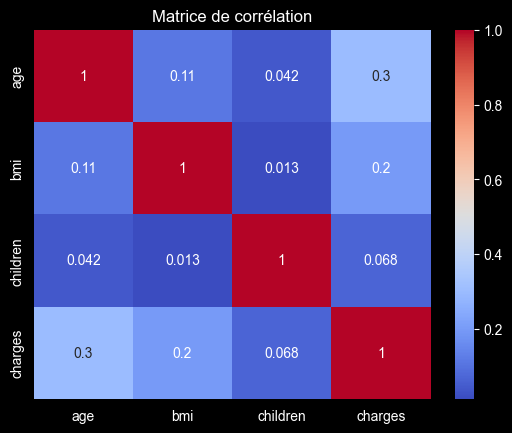

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

Charge - Age : relation positive modérée <br>
Charges - BMI : relation positive faible <br>
Charges - Children : relation très faible

Les autres relations sortent du cadre de notre projet (estimation des coûts médicaux). Cependant, elles restent intéressantes pour d'autres études, telles que le nombre d'enfants à charge selon l'âge des individus, ...

Cette analyse exploratoire avec des modèles graphiques nous aide à identifier les relations entre variables et nous guider pour la sélection des modèles.

# Préparation des donnes et Feature Engineering

Avant d'effectuer l'entrainement des modèles de Machine Learning, après l'analyse des données, ces dernières doivent être préparées.

Afin d'effectuer la préparation, il faut :
- Séparer les variables explicatives (age, sexe, enfant, imc, enfant) de la variable cible (charges)
- Encoder les variables catégorielles (non numériques)
- Normaliser les variables numériques

Définition de la variable "charges" comme variable cible (y), et les autres comme variables explicatives (x)

In [21]:
# X contient les variables explicatives (features) - informations sur les personnes
# Supression de la colonne "charges" - variable à prédire
X = df.drop("charges", axis=1)

# y contient la variable cible (target) - montant des charges à prédire
y = df["charges"]

In [22]:
# Transformation des variables catégorielles en variables numériques
# pd.get_dummies créer des colonnes binaires pour chaque catégorie$
# drop_first=True, pour éviter la redondance des colonnes
X_encoded = pd.get_dummies(X, drop_first=True)

# Affichage des 5 premières lignes après encodage afin de vérifier la transformation
X_encoded.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


One-hot encoding : les variables catégorielles (sex, smoker, region) sont transformées en variables numériques.

La transformation est nécessaire pour l'utilisation des algorithmes de machine learning qui ne peuvent pas traiter les variables en format texte.

In [23]:
# Import de l'outil StandardScaler de scikit-learn pour la normalisaiton des variables numériques
from sklearn.preprocessing import StandardScaler

# Création d'un objet scaler - qui apprendra les statistiques des données
scaler = StandardScaler()

# standardisation et transformation des donées
# fit : calcul de la moyenne et écart-type
# transfrom : applique la transformation
X_scaled = scaler.fit_transform(X_encoded)

La **normalisation** permet de mettre toutes les variables sur la même échelle afin d’améliorer la performance de certains modèles sensibles aux distances, comme la régression linéaire et les KNN.

Après cette transformation :
- moyenne ≈ 0
- écart-type ≈ 1

Ainsi, toutes les variables sont comparables entre elles.

Par exemple, si auparavant un IMC avait une valeur de 25, après normalisation il pourra :

- être négatif (valeur inférieure à la moyenne)
- être égal à 0 (valeur égale à la moyenne)
- être positif (valeur supérieure à la moyenne)

Cela signifie également que la dispersion des valeurs est normalisée.

Un écart-type égal à 1 signifie que :

- 1 correspond à un écart-type au-dessus de la moyenne
- -1 correspond à un écart-type en dessous de la moyenne
- 2 correspond à deux écarts-types au-dessus de la moyenne

In [24]:
# Import de la fonction train_test_split de scikit-learn afin de séparer les données
from sklearn.model_selection import train_test_split

# Séparation du jeu de données en deux parties
# X_scaled, variables explicative (déjà standardisées)
# y, vairable cible (charges)
# test_size, séparation du jeu de données.
# random_state, hasard pour obtenir toujours la même séparation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Le 20% des donneés est utilisé pour le jeu de test et le 80% pour l'entraînement :
- X_train et y_train sont les données utilisées pour l'entraînement du modèle
- X_test et y_test sont les données utilisées pour l'évaluation du modèle

Cette séparation est très utile afin que le modèle n'aprenne pas les données par coeur ainisi que pour tester la capacité de prédiction avec des nouvelles données.